## Scratch Notebook for TS calculations

### Initialize

In [1]:
import time
import matplotlib.pyplot as plt
from inverse_thomson_scattering.v0 import form_factor as np_ff
from inverse_thomson_scattering.jax import form_factor as jnp_ff
from inverse_thomson_scattering.utils import plotting
import numpy as np

/Users/archis/Dev/code/ergodic/inverse-thomson-scattering/venv/lib/python3.9/site-packages/jax/_src/lib/__init__.py:34: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
x = np.array(np.arange(-8, 8, 0.1))
distf = 1 / (2 * np.pi) ** (1 / 2) * np.exp(-(x**2) / 2)
sa = np.linspace(55, 65, 10)
# backend = "jax"

In [3]:
# if backend == "numpy":
t0 = time.time()
formf, lams = np_ff.nonMaxwThomson(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, [400, 700], 526.5, sa, distf, x)
t1 = time.time()
print(f"numpy/scipy form factor calculation {np.round(t1 - t0, 4)} s")

numpy/scipy form factor calculation 0.2091 s


/Users/archis/Dev/code/ergodic/inverse-thomson-scattering/inverse_thomson_scattering/v0/ratintn.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  out[:, ~iflat] = rfn[:, ~iflat]


In [4]:
# elif backend == "jax":
# get the functions
ff_fn, vg_ff_fn = jnp_ff.get_form_factor_fn([400, 700], 526.5)

# run them once so they're compiled
_ = ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))
_ = vg_ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))

# then run them again to benchmark them
# TODO: find a better way to measure this
t0 = time.time()
formf_jax, lams_jax = ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))
t1 = time.time()
print(f"jax form factor calculation took {np.round(t1 - t0, 4)} s")

jax form factor calculation took 0.0394 s


In [5]:
t0 = time.time()
val, grad = vg_ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))
t1 = time.time()
print(f"value and gradient took {np.round(t1 - t0, 4)} s")
print(f"gradient was {grad}")

value and gradient took 0.0633 s
gradient was 72329.25531709427


L2 norm between jax and np/sp is 4.171008884436013


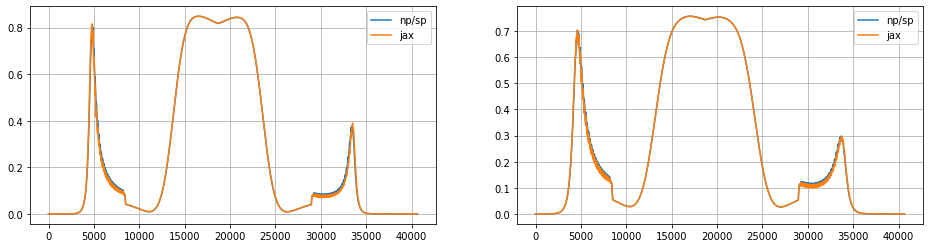

In [6]:
plotting.make_plots(formf, formf_jax)